In [2]:
import os
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('/home/baris/Desktop/eye_state_prediction_EEG/data/eeg-neuroheadset/eeg-headset.csv')
data.head()

,AF3,F7,F3,FC5,T7,P,O1,O2,P8,T8,FC6,F4,F8,AF4,eye_state
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,1
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,1
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,1
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,1
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,1


In [7]:
data.shape

(14980, 15)

Explatory Data Analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14980 entries, 0 to 14979
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AF3        14980 non-null  float64
 1   F7         14980 non-null  float64
 2   F3         14980 non-null  float64
 3   FC5        14980 non-null  float64
 4   T7         14980 non-null  float64
 5   P          14980 non-null  float64
 6   O1         14980 non-null  float64
 7   O2         14980 non-null  float64
 8   P8         14980 non-null  float64
 9   T8         14980 non-null  float64
 10  FC6        14980 non-null  float64
 11  F4         14980 non-null  float64
 12  F8         14980 non-null  float64
 13  AF4        14980 non-null  float64
 14  eye_state  14980 non-null  int64  
dtypes: float64(14), int64(1)
memory usage: 1.7 MB


In [9]:
print("\nDistribution of eye_state:")
print(data['eye_state'].value_counts())


Distribution of eye_state:
eye_state
1    8257
2    6723
Name: count, dtype: int64


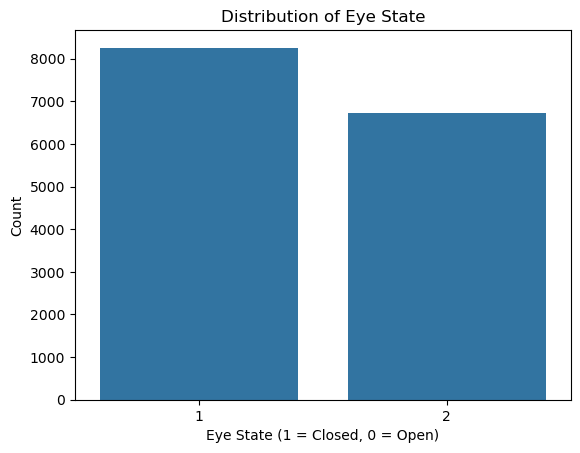

In [11]:
# Plot the distribution of eye_state
sns.countplot(x='eye_state', data=data)
plt.title('Distribution of Eye State')
plt.xlabel('Eye State (1 = Closed, 0 = Open)')
plt.ylabel('Count')
plt.show()

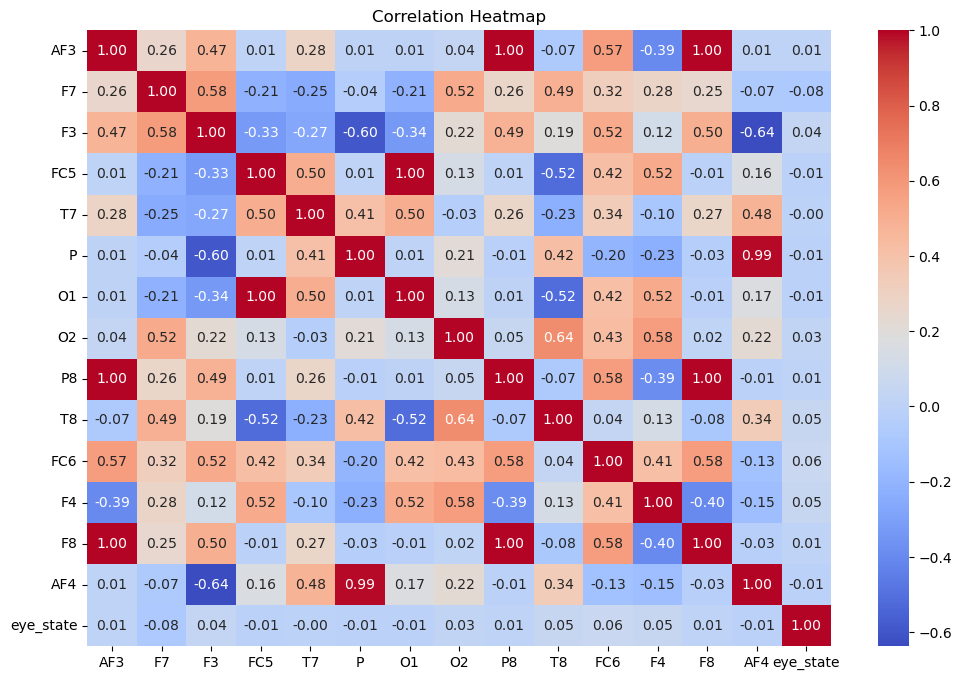

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

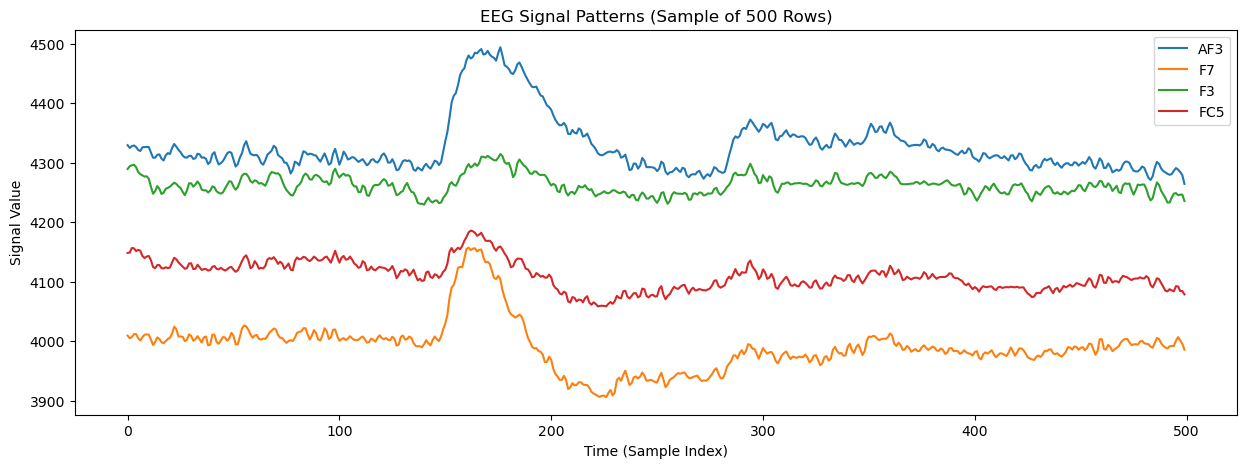

In [13]:
plt.figure(figsize=(15, 5))
for col in ['AF3', 'F7', 'F3', 'FC5']:
    plt.plot(data[col][:500], label=col)  # Plot only the first 500 rows for clarity
plt.title('EEG Signal Patterns (Sample of 500 Rows)')
plt.xlabel('Time (Sample Index)')
plt.ylabel('Signal Value')
plt.legend()
plt.show()

In [14]:
# Statistical Feature Extraction
stats = data.drop(columns=['eye_state']).agg(['mean', 'std', 'skew', 'kurtosis'])
print("\nStatistical Features of EEG Signals:")
print(stats)



Statistical Features of EEG Signals:
                   AF3           F7           F3           FC5           T7  \
mean       4321.917777  4009.767694  4264.022433   4164.946326  4341.741075   
std        2492.072174    45.941672    44.428052   5216.404632    34.738821   
skew        122.293865    39.046558   -13.615161    122.387777     7.561902   
kurtosis  14963.840002  3210.171915  2921.967694  14979.178735  2578.229693   

                     P            O1           O2            P8           T8  \
mean       4644.022379   4110.400160  4616.056904   4218.826610  4231.316200   
std        2924.789537   4600.926543    29.292603   2136.408523    38.050903   
skew        122.362811    122.383593    51.097219    122.334671    10.230701   
kurtosis  14975.088891  14978.495282  4491.114046  14970.509846  2710.083429   

                  FC6           F4            F8           AF4  
mean      4202.456900  4279.232774   4615.205336   4416.435832  
std         37.785981    41.544312 

In [15]:
# Compare Statistics for Eye States
eye_open = data[data['eye_state'] == 0]
eye_closed = data[data['eye_state'] == 1]

print("\nMean Signal Values (Eye Open):")
print(eye_open.drop(columns=['eye_state']).mean())
print("\nMean Signal Values (Eye Closed):")
print(eye_closed.drop(columns=['eye_state']).mean())


Mean Signal Values (Eye Open):
AF3   NaN
F7    NaN
F3    NaN
FC5   NaN
T7    NaN
P     NaN
O1    NaN
O2    NaN
P8    NaN
T8    NaN
FC6   NaN
F4    NaN
F8    NaN
AF4   NaN
dtype: float64

Mean Signal Values (Eye Closed):
AF3    4298.402552
F7     4013.083756
F3     4262.462922
FC5    4200.391388
T7     4341.752633
P      4664.726001
O1     4140.387390
O2     4615.393493
P8     4200.367181
T8     4229.695026
FC6    4200.264826
F4     4277.434783
F8     4600.899882
AF4    4456.567286
dtype: float64


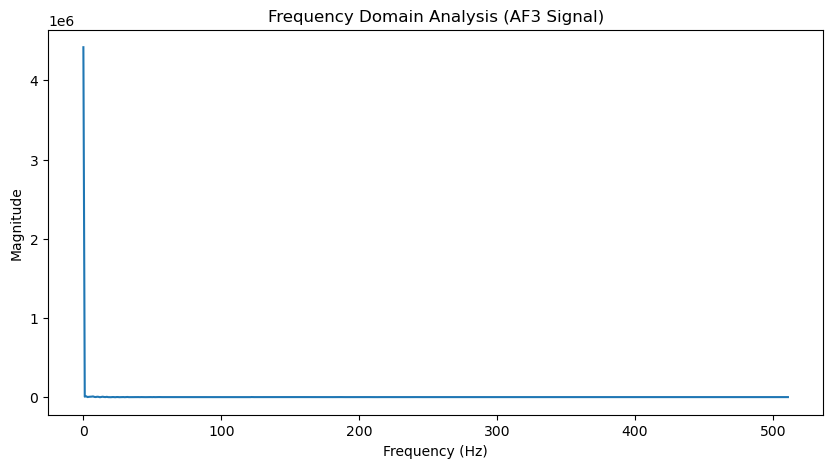

In [16]:
from scipy.fft import fft

# Ensure the column is converted to a numpy array
fft_signal = fft(data['AF3'].values[:1024])  # Convert to numpy array and take the first 1024 samples
fft_magnitude = np.abs(fft_signal)

# Plot the FFT magnitude
plt.figure(figsize=(10, 5))
plt.plot(fft_magnitude[:512])  # Plot only the positive frequencies
plt.title('Frequency Domain Analysis (AF3 Signal)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()

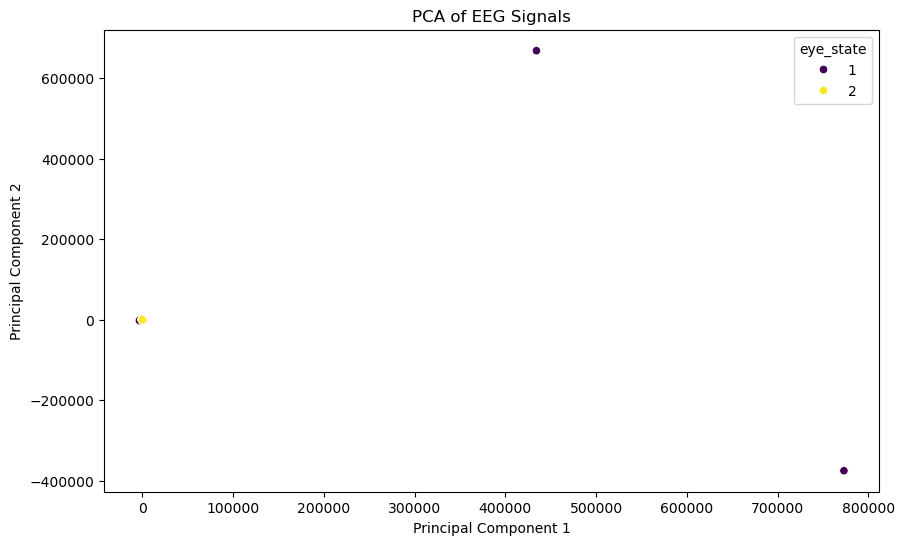

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data.drop(columns=['eye_state']))

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=data['eye_state'], palette='viridis')
plt.title('PCA of EEG Signals')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

CLASSIFICATION

Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      1651
           2       0.94      0.90      0.92      1345

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996



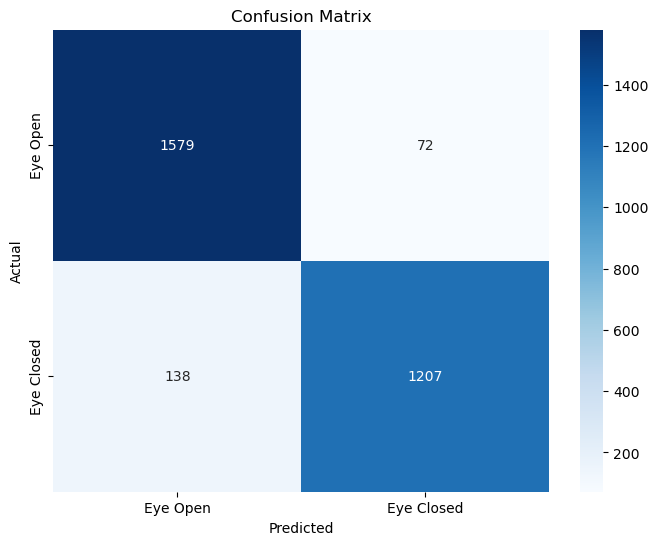

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features (EEG signals) and target (eye_state)
X = data.drop(columns=['eye_state'])  # Drop the target column
y = data['eye_state']                 # Target column

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Eye Open', 'Eye Closed'], yticklabels=['Eye Open', 'Eye Closed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model: Logistic Regression
Accuracy: 0.59
              precision    recall  f1-score   support

           1       0.60      0.76      0.67      1651
           2       0.56      0.37      0.44      1345

    accuracy                           0.59      2996
   macro avg       0.58      0.56      0.56      2996
weighted avg       0.58      0.59      0.57      2996

--------------------------------------------------
Model: Random Forest
Accuracy: 0.93
              precision    recall  f1-score   support

           1       0.92      0.96      0.94      1651
           2       0.94      0.90      0.92      1345

    accuracy                           0.93      2996
   macro avg       0.93      0.93      0.93      2996
weighted avg       0.93      0.93      0.93      2996

--------------------------------------------------
Model: SVM
Accuracy: 0.69
              precision    recall  f1-score   support

           1       0.66      0.93      0.77      1651
           2       0.83      0.

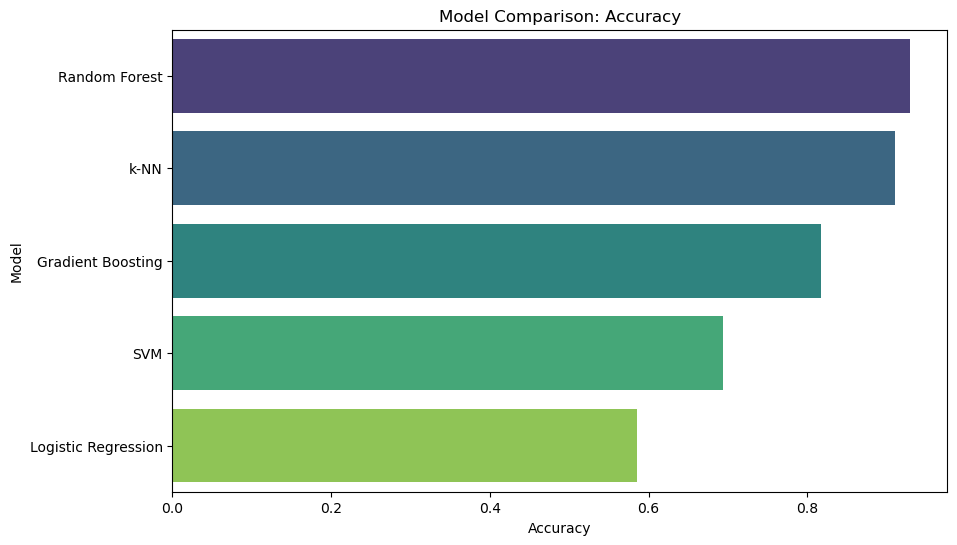

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Features and Target
X = data.drop(columns=['eye_state'])
y = data['eye_state']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Train and Evaluate Models
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Compare Results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Plot Results
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison: Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Adding LightGBM to the Models Dictionary
models["LightGBM"] = LGBMClassifier(random_state=42)

# Train and Evaluate Models (including LightGBM)
results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# Compare Results
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Plot Results
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=results_df, palette='viridis')
plt.title("Model Comparison: Accuracy (Including LightGBM)")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()